In [1]:
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import argparse
import cv2 #Sirve para imagenes
%matplotlib inline

In [2]:
import os
path_image=os.getcwd()[:-38]+"Data/paisaje.jpeg"
path_image

'/Users/jesusarredondo/Documents/Diplomado/Modulo3/Data/paisaje.jpeg'

In [3]:
imagen=cv2.imread(path_image)
#Uso de imagenes para problemas de marketing
#detectar colores principales en una imagen por un cluster

In [4]:
imagen #Pixeles y rgv

array([[[144,  69, 185],
        [150,  70, 199],
        [170,  85, 237],
        ...,
        [ 69,  20, 104],
        [ 83,  35, 117],
        [ 96,  48, 130]],

       [[122,  45, 166],
        [143,  65, 196],
        [135,  48, 205],
        ...,
        [ 99,  51, 139],
        [100,  53, 139],
        [ 98,  51, 137]],

       [[125,  48, 176],
        [145,  64, 203],
        [133,  45, 205],
        ...,
        [ 77,  28, 126],
        [ 68,  23, 116],
        [ 61,  16, 109]],

       ...,

       [[ 98, 102,   1],
        [ 98, 102,   1],
        [ 95, 101,   0],
        ...,
        [ 70,  71,  21],
        [ 70,  70,  22],
        [ 70,  70,  22]],

       [[ 97,  99,   3],
        [ 97,  99,   3],
        [ 94,  98,   2],
        ...,
        [ 69,  68,  18],
        [ 69,  67,  19],
        [ 71,  67,  19]],

       [[ 96,  97,   3],
        [ 96,  97,   3],
        [ 93,  97,   2],
        ...,
        [ 68,  65,  14],
        [ 68,  64,  15],
        [ 69,  64,  15]]

In [5]:
imagen.shape

(183, 275, 3)

In [6]:
#cv2 no lee en rgv si no en vgr
imagen=cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

In [7]:
imagen


array([[[185,  69, 144],
        [199,  70, 150],
        [237,  85, 170],
        ...,
        [104,  20,  69],
        [117,  35,  83],
        [130,  48,  96]],

       [[166,  45, 122],
        [196,  65, 143],
        [205,  48, 135],
        ...,
        [139,  51,  99],
        [139,  53, 100],
        [137,  51,  98]],

       [[176,  48, 125],
        [203,  64, 145],
        [205,  45, 133],
        ...,
        [126,  28,  77],
        [116,  23,  68],
        [109,  16,  61]],

       ...,

       [[  1, 102,  98],
        [  1, 102,  98],
        [  0, 101,  95],
        ...,
        [ 21,  71,  70],
        [ 22,  70,  70],
        [ 22,  70,  70]],

       [[  3,  99,  97],
        [  3,  99,  97],
        [  2,  98,  94],
        ...,
        [ 18,  68,  69],
        [ 19,  67,  69],
        [ 19,  67,  71]],

       [[  3,  97,  96],
        [  3,  97,  96],
        [  2,  97,  93],
        ...,
        [ 14,  65,  68],
        [ 15,  64,  68],
        [ 15,  64,  69]]

In [8]:
imagen.shape

(183, 275, 3)

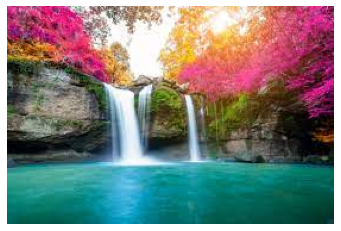

In [9]:
plt.figure()
plt.axis("off")
plt.imshow(imagen)
#graficamos la imagen

In [10]:
imagen = imagen.reshape((imagen.shape[0] * imagen.shape[1], 3)) #acomodamos los sensores

In [11]:
imagen

array([[185,  69, 144],
       [199,  70, 150],
       [237,  85, 170],
       ...,
       [ 14,  65,  68],
       [ 15,  64,  68],
       [ 15,  64,  69]], dtype=uint8)

In [12]:
clt = KMeans(n_clusters = 3) #usamos 3 para saber los 3 colores predominantes
clt.fit(imagen) #Pasamos la matriz

KMeans(n_clusters=3)

In [13]:
"""Tomamos el centroide para los colores representativos"""
def centroid_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

def plot_colors(hist, centroids):

    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    
    for (percent, color) in zip(hist, centroids):

        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1) #Llenamos el regtangulo con los colores del centroide
        startX = endX
    return bar

In [14]:
clt.cluster_centers_ #centroides

array([[216.43983184, 218.53914871, 210.6245402 ],
       [183.6662037 , 102.09232804, 104.6962963 ],
       [ 41.83271119,  91.80687131,  84.74029645]])

In [15]:
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)


In [16]:
hist

array([0.15091903, 0.30058619, 0.54849478])

In [17]:
clt.cluster_centers_

array([[216.43983184, 218.53914871, 210.6245402 ],
       [183.6662037 , 102.09232804, 104.6962963 ],
       [ 41.83271119,  91.80687131,  84.74029645]])

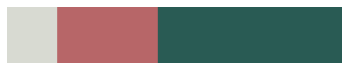

In [18]:
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()